## Logistic Regression with Python

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data

In [47]:
ad_data = pd.read_csv('........\advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis (EDA)

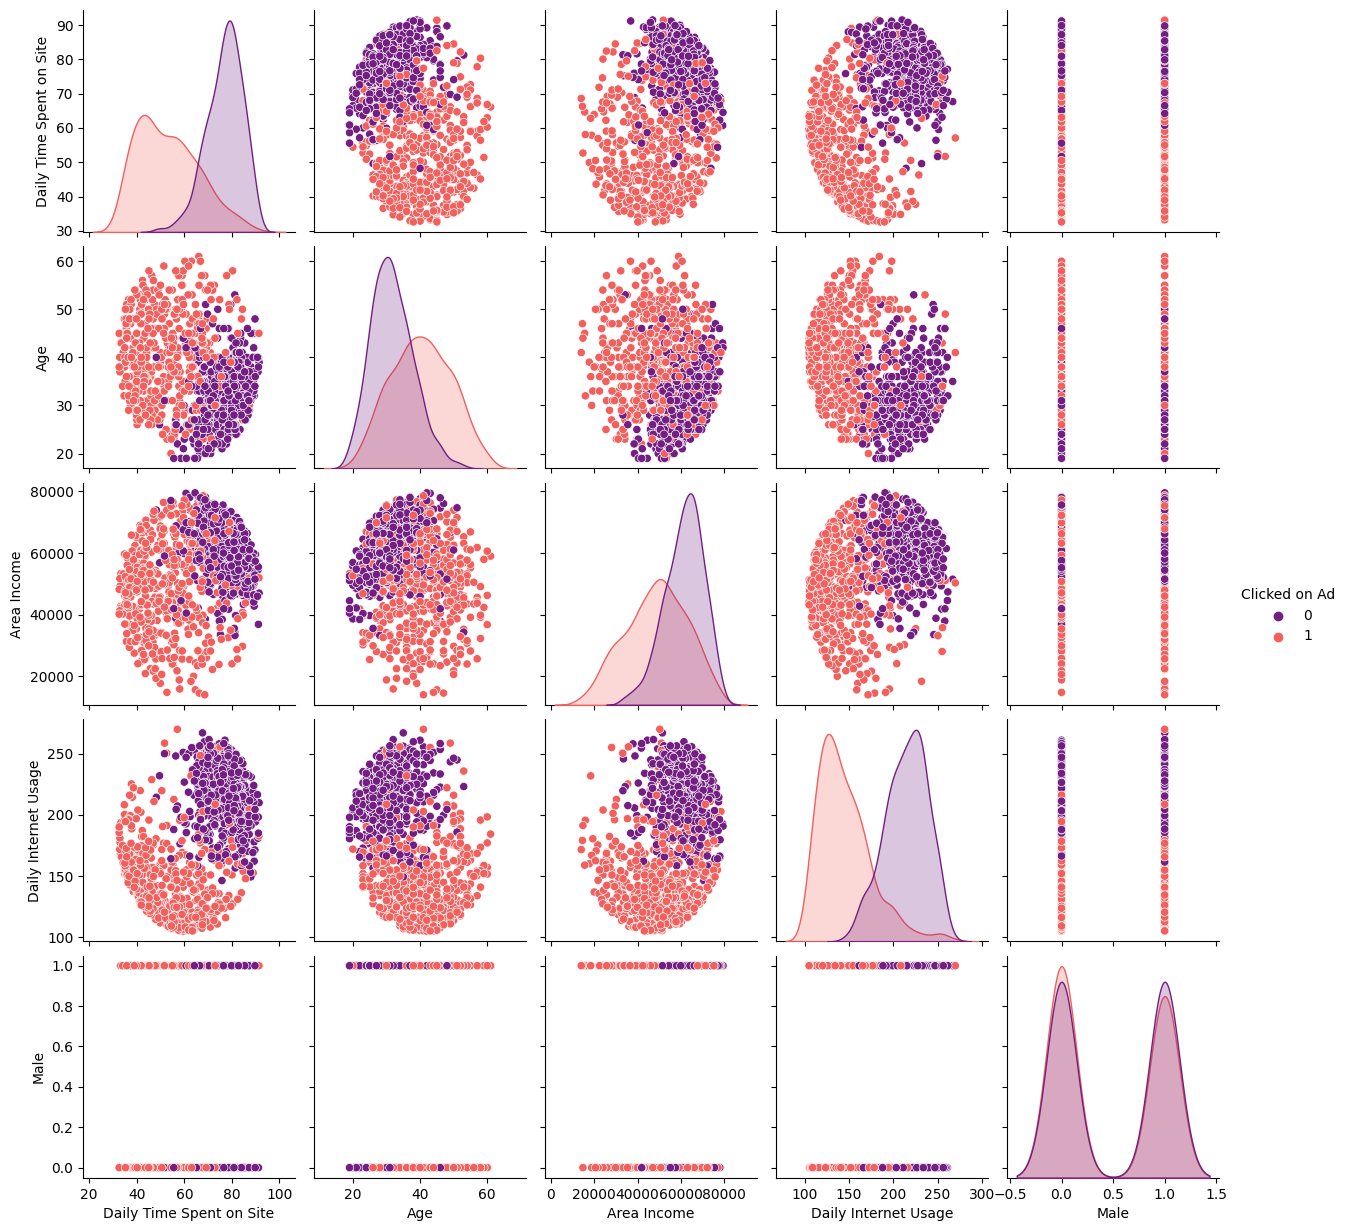

In [13]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='magma') # bwr, magma, crest, rocket_r, flare, mako, rocket, viridis

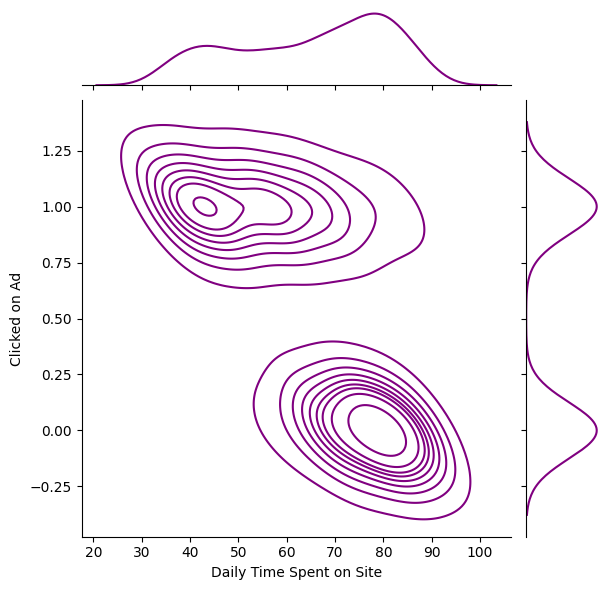

In [12]:
sns.jointplot(x='Daily Time Spent on Site', y='Clicked on Ad', data=ad_data, color='purple', kind='kde')

### Preparation Of Data

In [14]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [48]:
type(ad_data['Timestamp'].loc[1])

str

In [49]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp']).apply(lambda x: x.dayofweek)

In [50]:
ad_data.rename({'Timestamp': 'DayOfWeek'}, inplace=True, axis=1)

In [51]:
ad_data = pd.concat([ad_data, pd.get_dummies(ad_data['DayOfWeek'], drop_first=True)], axis=1)

In [52]:
ad_data.drop(['Ad Topic Line','City','Country','DayOfWeek'], axis=1, inplace=True)

In [73]:
ad_data.rename({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True, axis=1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,1
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,0,1
4,68.37,35,73889.99,225.58,0,0,0,0,0,1,0,0


### Training and Testing Data

In [74]:
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Training the Model

In [77]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

### Predicting Test Data

In [78]:
predictions = logReg.predict(X_test)

### Evaluating the Model

### Score

In [79]:
print(logReg.score(X_test, y_test))

0.9212121212121213


### confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[160  11]
 [ 15 144]]


### Classification Report

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       171
           1       0.93      0.91      0.92       159

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330

